In [98]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.preprocessing import LabelBinarizer, Normalizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [52]:
path = '../../PDproj/plasmadata/clean/'
filenames = [line.rstrip() for line in open(path +'filenames.txt')]
filenames

['plasmaHILICnegGFstatus_log2.csv',
 'plasmaHILICposGFstatus_log2.csv',
 'plasmalipidnegwithGFstatus_log2.csv',
 'plasmalipidposwithGFstatus_log2.csv',
 'plasmaRPnegGFstatus_log2.csv',
 'plasmaRPposGFstatus_log2.csv']

In [53]:
fnum=0
df = pd.read_csv(path + filenames[fnum],sep=';', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,214,215,216,217,218,219,220,221,222,223
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,female,female,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Control,Control,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Name,Formula,Annot. DeltaMass [ppm],Calc. MW,m/z,RT [min],MS2,Reference Ion,Area: 221013_SarkaLehtonen_Plasma_Hilic_neg_00...,Area: 221013_SarkaLehtonen_Plasma_Hilic_neg_00...,...,Gap Fill Status: 221013_SarkaLehtonen_Plasma_H...,Gap Fill Status: 221013_SarkaLehtonen_Plasma_H...,Gap Fill Status: 221013_SarkaLehtonen_Plasma_H...,Gap Fill Status: 221013_SarkaLehtonen_Plasma_H...,Gap Fill Status: 221013_SarkaLehtonen_Plasma_H...,Gap Fill Status: 221013_SarkaLehtonen_Plasma_H...,Gap Fill Status: 221013_SarkaLehtonen_Plasma_H...,Gap Fill Status: 221013_SarkaLehtonen_Plasma_H...,Gap Fill Status: 221013_SarkaLehtonen_Plasma_H...,Gap Fill Status: 221013_SarkaLehtonen_Plasma_H...
4,NaN,NaN,NaN,58.98158,57.9743,0.524,DDA for preferred ion,[M-H]-1,21.9069624983412,22.29011804606081,...,0,0,0,0,0,0,0,0,0,0


In [64]:
gender = df.iloc[0,8:80]
group = df.iloc[1,8:80]
time = df.iloc[2,8:80]
area = df.iloc[4:,8:80]

In [99]:
Gen = LabelBinarizer().fit_transform(gender)
Grp = LabelBinarizer().fit_transform(group)
T = LabelBinarizer().fit_transform(time)
A = area.to_numpy(dtype=float)
X=Normalizer().fit_transform(A.T)

In [67]:
pca = PCA(n_components=10).fit_transform(A.T)

In [82]:
mark = []
for gen in Gen:
    if gen==0:
        mark.append('o')
    else:
        mark.append('x')
mark = np.asarray(mark)

In [83]:
ind1 = np.where(mark=='o')[0]
ind2 = np.where(mark=='x')[0]

In [86]:
ind2

array([ 4,  5,  6, 11, 13, 18, 20, 21, 22, 24, 25, 31, 32, 33, 34, 35, 37,
       39, 41, 42, 44, 45, 49, 50, 51, 52, 53, 57, 59, 61, 63, 64, 65, 66,
       67, 69, 70, 71])

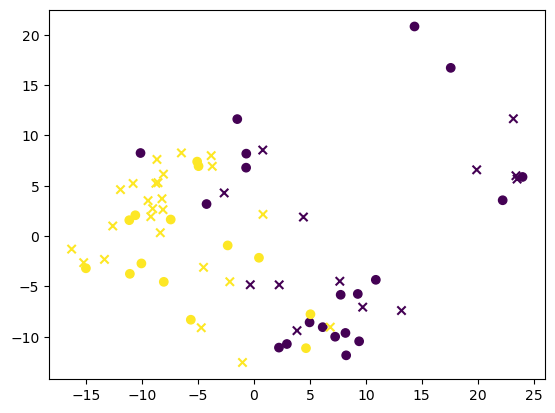

In [96]:
plt.scatter(pca[ind1,0],pca[ind1,1], c=Grp[ind1],marker='o')
plt.scatter(pca[ind2,0],pca[ind2,1], c=Grp[ind2],marker='x')

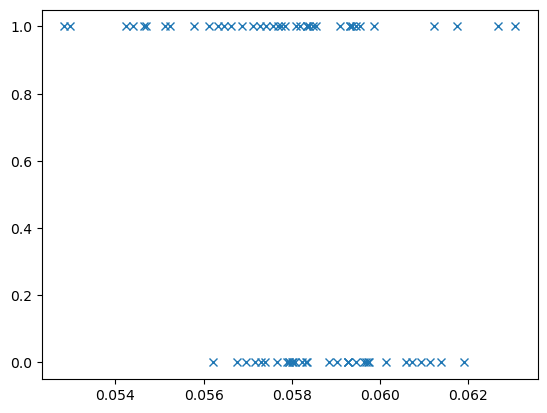

In [113]:
plt.plot(X[:,0],Grp,'x')

In [108]:
Grp.flatten().shape

(72,)

In [114]:
model=LogisticRegression().fit(pca,Grp.flatten())

In [117]:
model.predict(pca)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

In [119]:
Grp.flatten()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

In [118]:
model.score(pca,Grp.flatten())

0.9583333333333334

In [149]:
model=LogisticRegression().fit(pca[:,:30],Gen.flatten())

In [150]:
model.score(pca[:,:30],Gen.flatten())

0.8611111111111112